In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot

In [23]:
# Constants
N         = 1000.            # State of Georgia Population                [humans]
alpha     = 0.86                 # Probability of becoming asymptomatic       []
beta_Y    = 0.62                 # Symptomatic to Susceptible Contact Period  [1/days]
beta_A    = 1.12                 # Asymptomatic to Susceptible Contact Period [1/days]
gamma     = 1 / 5.1              # Mean Incubation Period                     [1/days]
delta     = 0.032 * (1 - alpha)  # Disease-Induced Death Rate                 [1/days]
Lambda    = 0.                   # Human Recruitment Rate                     [humans/days]
lambda_AR = 0.05                 # Mean Asymptomatic Infectious Period        [1/days]
lambda_AY = 0.                   # Asymptomatic to Symptomatic Period         [1/days]
lambda_RS = 0.                   # Relapse Period                             [1/days]
lambda_YR = 0.027                # Mean Syptomatic Infectious Period          [1/days]
xi        = 0.                   # Natural Mortality Period                   [1/days]

# Initial conditions
E0 = 0
Y0 = 1
A0 = 0
R0 = 0
S0 = N - E0 - Y0 - A0 - R0

# Simulation Control
t_start = 0
t_end = 100

In [24]:
# dynamic system of equations
def seyar_model(t, y, N, alpha, beta_Y, beta_A, gamma, delta, Lambda, lambda_AR, lambda_AY, lambda_RS, lambda_YR, xi):
    S, E, Y, A, R = y
    lambda_SE = beta_Y * Y / N + beta_A * A / N
    
    Sdot = Lambda + lambda_RS * R - (xi + lambda_SE) * S
    Edot = lambda_SE * S - (xi + gamma) * E
    Ydot = gamma * (1 - alpha) * E + lambda_AY * A - (xi + delta + lambda_YR) * Y
    Adot = gamma * alpha * E - (xi + lambda_AY + lambda_AR) * A
    Rdot = lambda_YR * Y + lambda_AR * A - (xi + lambda_RS) * R
    
    return (Sdot, Edot, Ydot, Adot, Rdot)

In [25]:
# execute the model
y0 = (S0, E0, Y0, A0, R0)
constants = (N, alpha, beta_Y, beta_A, gamma, delta, Lambda, lambda_AR, lambda_AY, lambda_RS, lambda_YR, xi)
solution = solve_ivp(seyar_model, (t_start, t_end), y0, 'RK45', args=constants)

print(solution.message)
print(f'Solved in {solution.nfev} iterations.')

The solver successfully reached the end of the integration interval.
Solved in 236 iterations.


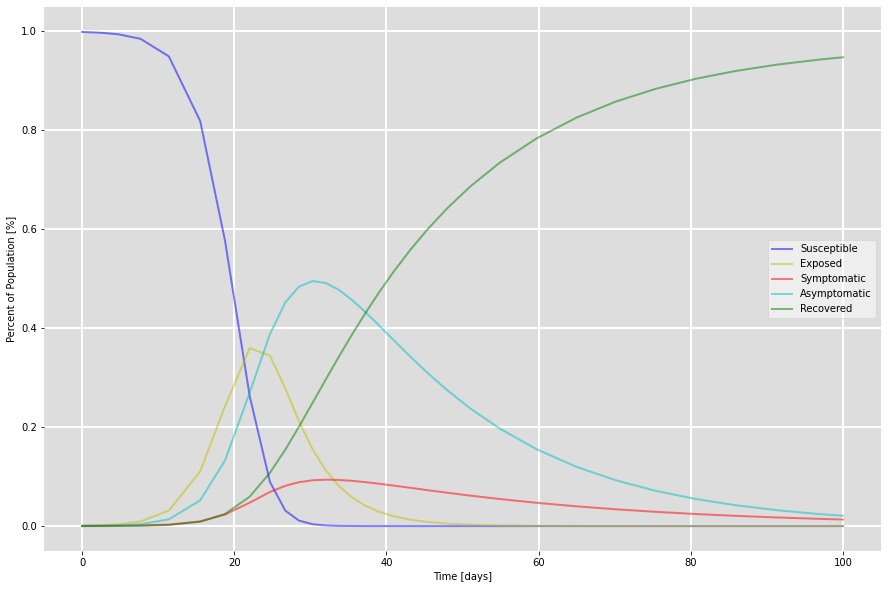

In [31]:
# plot the solution
t = solution.t
S, E, Y, A, R = solution.y

fig = pyplot.figure(facecolor='w', figsize=(15,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, Y/N, 'r', alpha=0.5, lw=2, label='Symptomatic')
ax.plot(t, A/N, 'c', alpha=0.5, lw=2, label='Asymptomatic')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Percent of Population [%]')
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
pyplot.show()

## Sources:

1. [Investigating the Impact of Asymptomatic Carriers on COVID-19 Transmission](https://www.medrxiv.org/content/10.1101/2020.03.18.20037994v1.full.pdf). Jacob B Aguilar, Juan B. Gutierrez.
2. [The SIR epidemic model](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/). 